In [ ]:
Project Description and Problem statement
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-
1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)
•	1- building_windows_float_processed
•	2- building_windows_non_float_processed
•	3- vehicle_windows_float_processed
•	4- vehicle_windows_non_float_processed (none in this database)
•	5- containers
•	6- tableware
•	7- headlamps
There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 

Predict : Type of glass
#the dataset can be divided into two classes therefore this is a binary classification problem

In [2]:
#Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
#pull the dataset
df =pd.read_csv(r"C:\Users\bee\Desktop\Data set\Glass Identification.csv")
df.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [4]:
df.tail()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
208,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
209,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
210,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
211,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
212,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [ ]:
#Exploratory data analysis(EDA)-this is where we do the following
#1.Check Shape of dataset 
#2.Check Null values 
#3.Checking information 
#4.Extracting Statistics of the dataset 
#5.Checking data dtypes 
#6.Check for duplicates in the dataset
#6.Transform the dataset,drop unnecessary columns or change column names to make data more meaningful

In [6]:
 #check the shape of dataset:
df.shape

(213, 11)

In [9]:
#checking dataset columns
#In this case the columns are numerical but the datatype is object.The column names dont speak to the data user therefore need to be changed to something that can be easy to comprehend
df.columns

Index(['1', '1.52101', '13.64', '4.49', '1.10', '71.78', '0.06', '8.75',
       '0.00', '0.00.1', '1.1'],
      dtype='object')

In [11]:
#Renaming columns according to what is provided in the project description
column_names = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','glass_type']
df.columns = column_names
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [12]:
#Now that the column names are clear,we see that the Id columns has no impact on the prediction required,it is a mere label therefore unnecessary,we drop it
#Dropping irrelevant columns which are simply labels
df.drop(columns= ['Id'], axis = 1, inplace = True)

In [13]:
#checking if the Id column has been removed
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [14]:
#printing a list of columns to have a clear view of coulmns in the dataset
df.columns.tolist()

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'glass_type']

In [32]:
#checking datatype
df.dtypes

RI            float64
Na            float64
Mg            float64
Al            float64
Si            float64
K             float64
Ca            float64
Ba            float64
Fe            float64
glass_type      int64
dtype: object

In [16]:
#Checking Duplicate value in dataframe
print("Total Duplicate Rows are",df.duplicated().sum())

Total Duplicate Rows are 1


In [26]:
df.drop_duplicates()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [28]:
 #check the shape of dataset after removing duplicates
df.shape

(213, 10)

In [31]:
#Checking information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RI          213 non-null    float64
 1   Na          213 non-null    float64
 2   Mg          213 non-null    float64
 3   Al          213 non-null    float64
 4   Si          213 non-null    float64
 5   K           213 non-null    float64
 6   Ca          213 non-null    float64
 7   Ba          213 non-null    float64
 8   Fe          213 non-null    float64
 9   glass_type  213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [33]:
#checking for null values(there are no null values)
df.isnull().sum()

RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
glass_type    0
dtype: int64

In [36]:
#checking number of unique values
df.nunique().to_frame("No. of Unique values")

,No. of Unique values
RI,177
Na,142
Mg,93
Al,117
Si,132
K,65
Ca,143
Ba,34
Fe,32
glass_type,6


<Axes: >

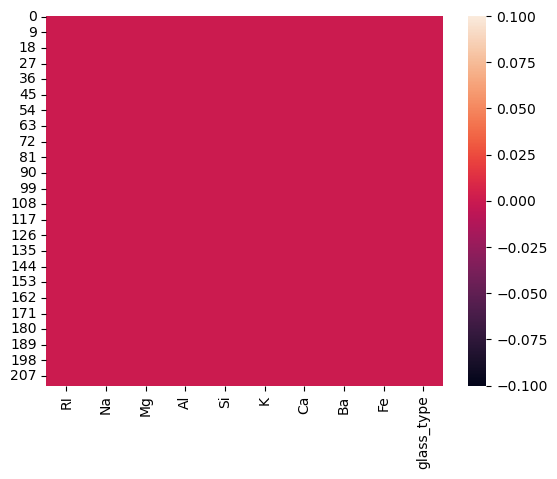

In [34]:
#checking null values using the heatmap(there no null values in the data set)
sns.heatmap(df.isnull())

In [35]:
#Extracting Statistics of the dataset
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
#from the statistical description above the count of all columns are similar therefore no missing data values
#mean value of RI,Na,AI,Ca,Ba,Fe and glass_type is greater than the median(second percentile)therefore the data is skewed to the right
#in columns Mg,Si,K the mean is less than the median therefore the data is skewed to the left
#I columns like glass_type,Fe,Ba,Ca,K,AI,Na there are huge differences between the third percentile and max values which signify the existance of outliers in the data.

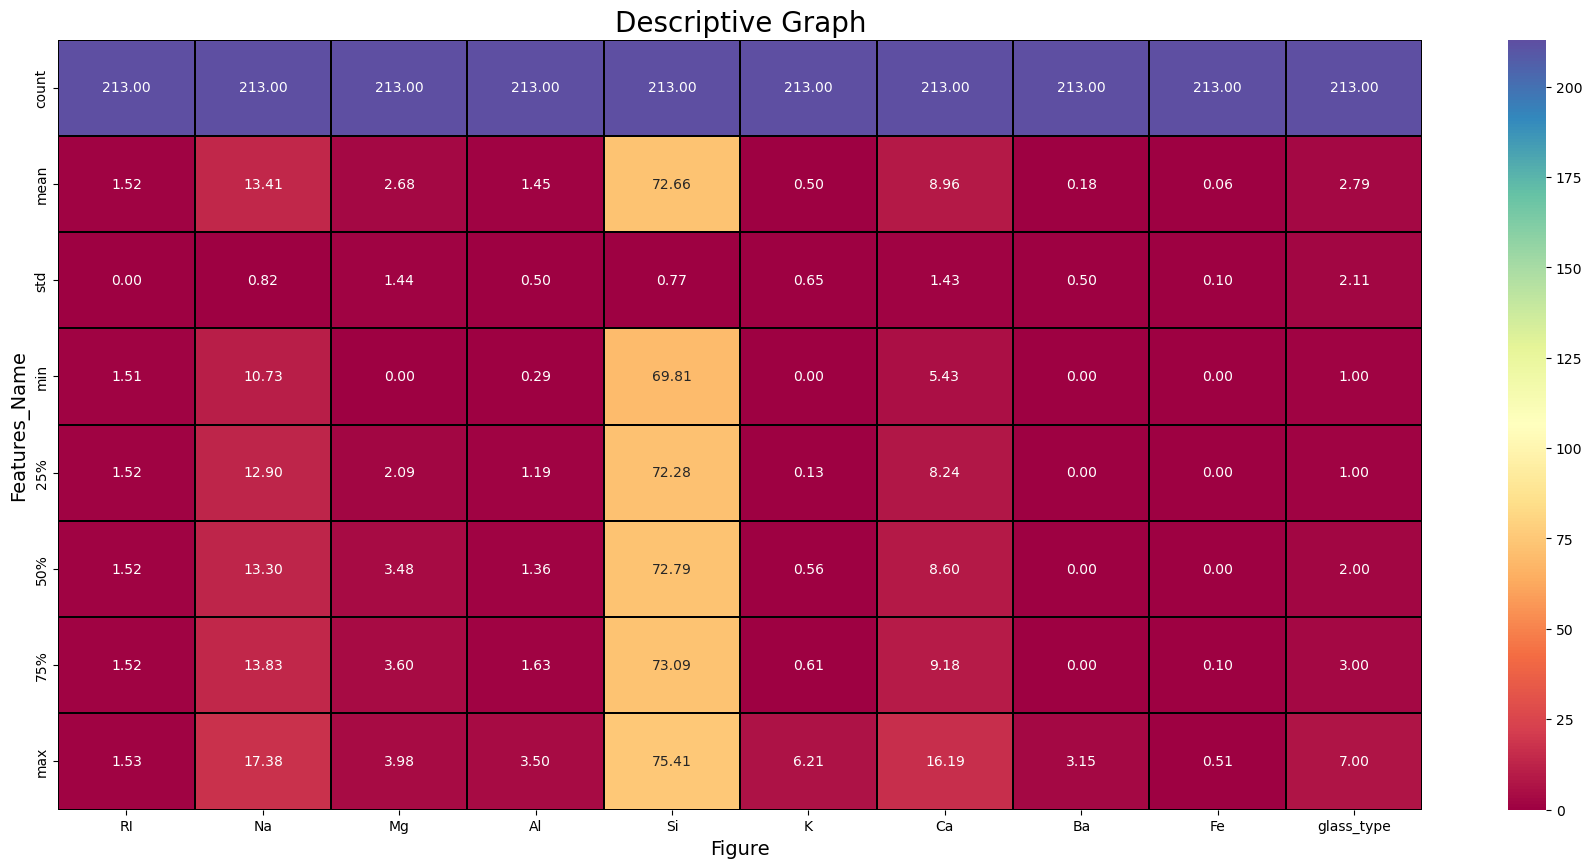

In [37]:
#Graphical view of statistical data description
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Features_Name',fontsize=14)
plt.title('Descriptive Graph',fontsize=20)
plt.show()

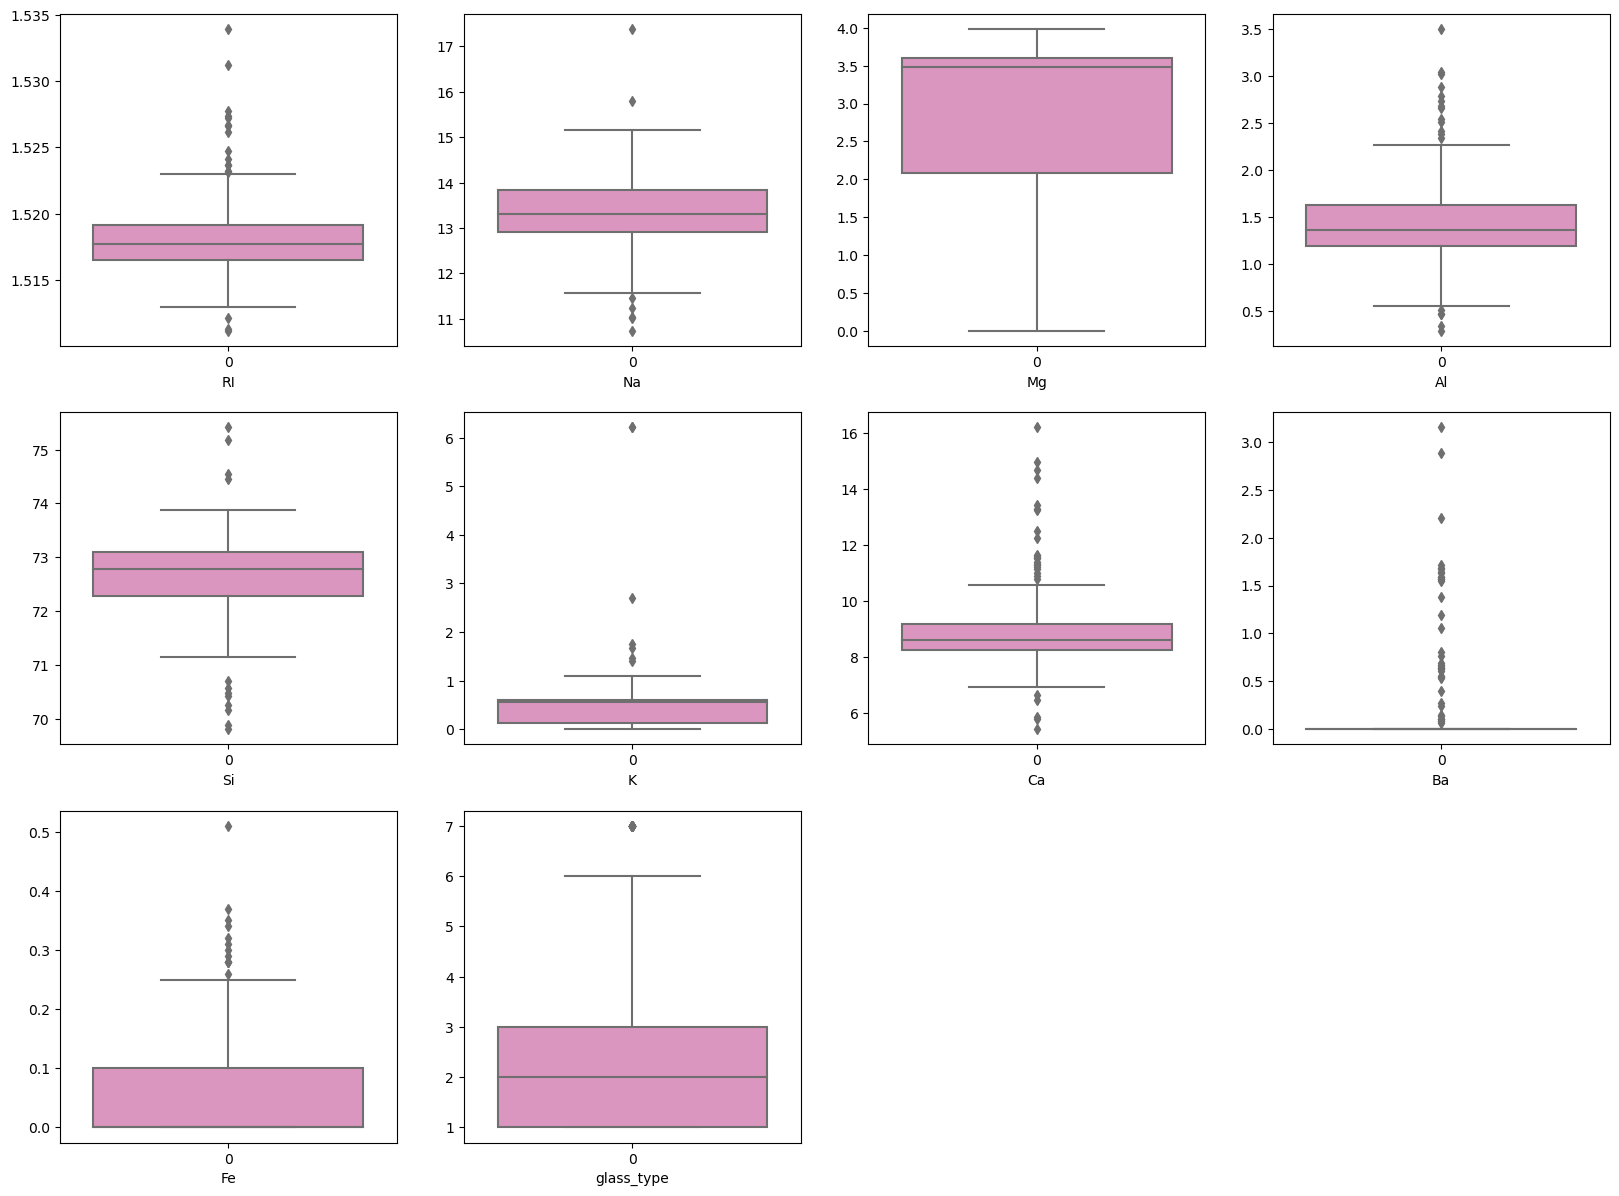

In [38]:
#Checking outliers using boxplot-This is a visual confirmation of the presence of outliers as explained in the statistical description
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i], palette ="Set2_r")
        plt.xlabel(i)
        
    p+=1
    
plt.show()

In [40]:
#Remove outliers using zscore method and Inter quartile range method then compare the two
#Note that we do not remove outliers from the target variable (glass_type)
from scipy.stats import zscore
out_features=df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
z=np.abs(zscore(out_features))
z

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.245101,0.591880,0.642937,0.173500,0.097091,0.029329,0.792599,0.353808,0.588301
1,0.716826,0.150946,0.608144,0.187433,0.433777,0.167472,0.827734,0.353808,0.588301
2,0.228607,0.240996,0.705564,0.313863,0.058303,0.108813,0.518546,0.353808,0.588301
3,0.307777,0.167507,0.656854,0.414122,0.550322,0.078115,0.623951,0.353808,0.588301
4,0.789399,0.755419,0.649895,0.347848,0.407878,0.216258,0.623951,0.353808,2.082200
...,...,...,...,...,...,...,...,...,...
208,0.700332,0.898085,1.862164,2.874379,0.058303,0.643296,0.156046,1.778672,0.588301
209,0.495808,1.853443,1.862164,1.089766,0.524423,0.766090,0.392060,2.844912,0.588301
210,0.757727,1.167545,1.862164,1.149921,0.990604,0.766090,0.363952,2.945501,0.588301
211,0.607966,1.192041,1.862164,0.989506,1.236644,0.766090,0.335844,2.804676,0.588301


In [41]:
#threshold
np.where (z>3)

(array([104, 105, 105, 105, 105, 105, 106, 106, 106, 109, 110, 111, 111,
        130, 144, 161, 162, 162, 162, 170, 170, 171, 171, 173, 183, 183,
        187, 188, 200, 200, 202, 206, 212], dtype=int64),
 array([6, 0, 1, 4, 6, 7, 0, 4, 6, 6, 6, 0, 6, 6, 8, 8, 3, 4, 7, 3, 5, 3,
        5, 8, 1, 4, 4, 7, 4, 5, 7, 7, 7], dtype=int64))

In [51]:
z.iloc[105,6]

3.0511693603015932

In [52]:
#removing the data above zscore and creating new dataframe
df1=df[(z<3).all(axis=1)]
df1.shape

(193, 10)

In [53]:
#shape of old and new dataframe
print("Old Data Frame-",df.shape[0])
print("New Data Frame-",df1.shape[0])

Old Data Frame- 213
New Data Frame- 193


In [54]:
print("Data Loss Percentage-",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage- 9.389671361502346


In [55]:
df1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
207,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,7
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7


In [56]:
df=df1

In [57]:
#Removing outliers using the interquartile range method
#1st quartile
Q1=out_features.quantile(0.25) 

#3rd quartile
Q3=out_features.quantile(0.75)

#IQR
IQR=Q3-Q1
df2=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df2.shape

(135, 10)

In [58]:
print("Data Loss Percentage-",((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data Loss Percentage- 30.05181347150259


In [59]:
#We will choose the z score method because it is resulting in less data loss
df=df1

<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      1
3      1
4      1
      ..
207    7
208    7
209    7
210    7
211    7
Name: glass_type, Length: 193, dtype: int64>


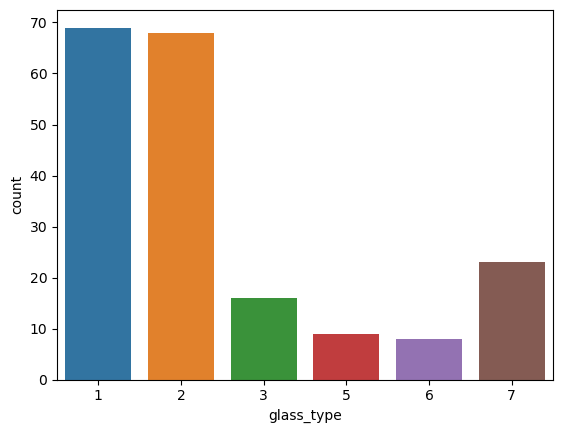

In [63]:
#Data visualization-Univariate analysis
#Visualize the glass_type categories.It is evident that the most common glass type is window glass
ax=sns.countplot(x='glass_type',data=df)
print(df['glass_type'].value_counts)

In [64]:
#Dividing the dataset into window glass (classes 1-4) and non-window glass (classes 5-7) as prescibed in the problem statement for ease of analysis
glass_type = []
for i in df['glass_type']:
    if i >= 1 and i <= 4:
        glass_type.append('1')
    elif i >= 5 and i <= 7:
        glass_type.append('2')

df['glass_type'] = glass_type

set(glass_type)

{'1', '2'}

In [70]:
#Defining the data labels and features(dependent and independent variables respectively)
features = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
label = ['glass_type']

X = df[features]

y = df[label]

y['glass_type'].unique()

array(['1', '2'], dtype=object)

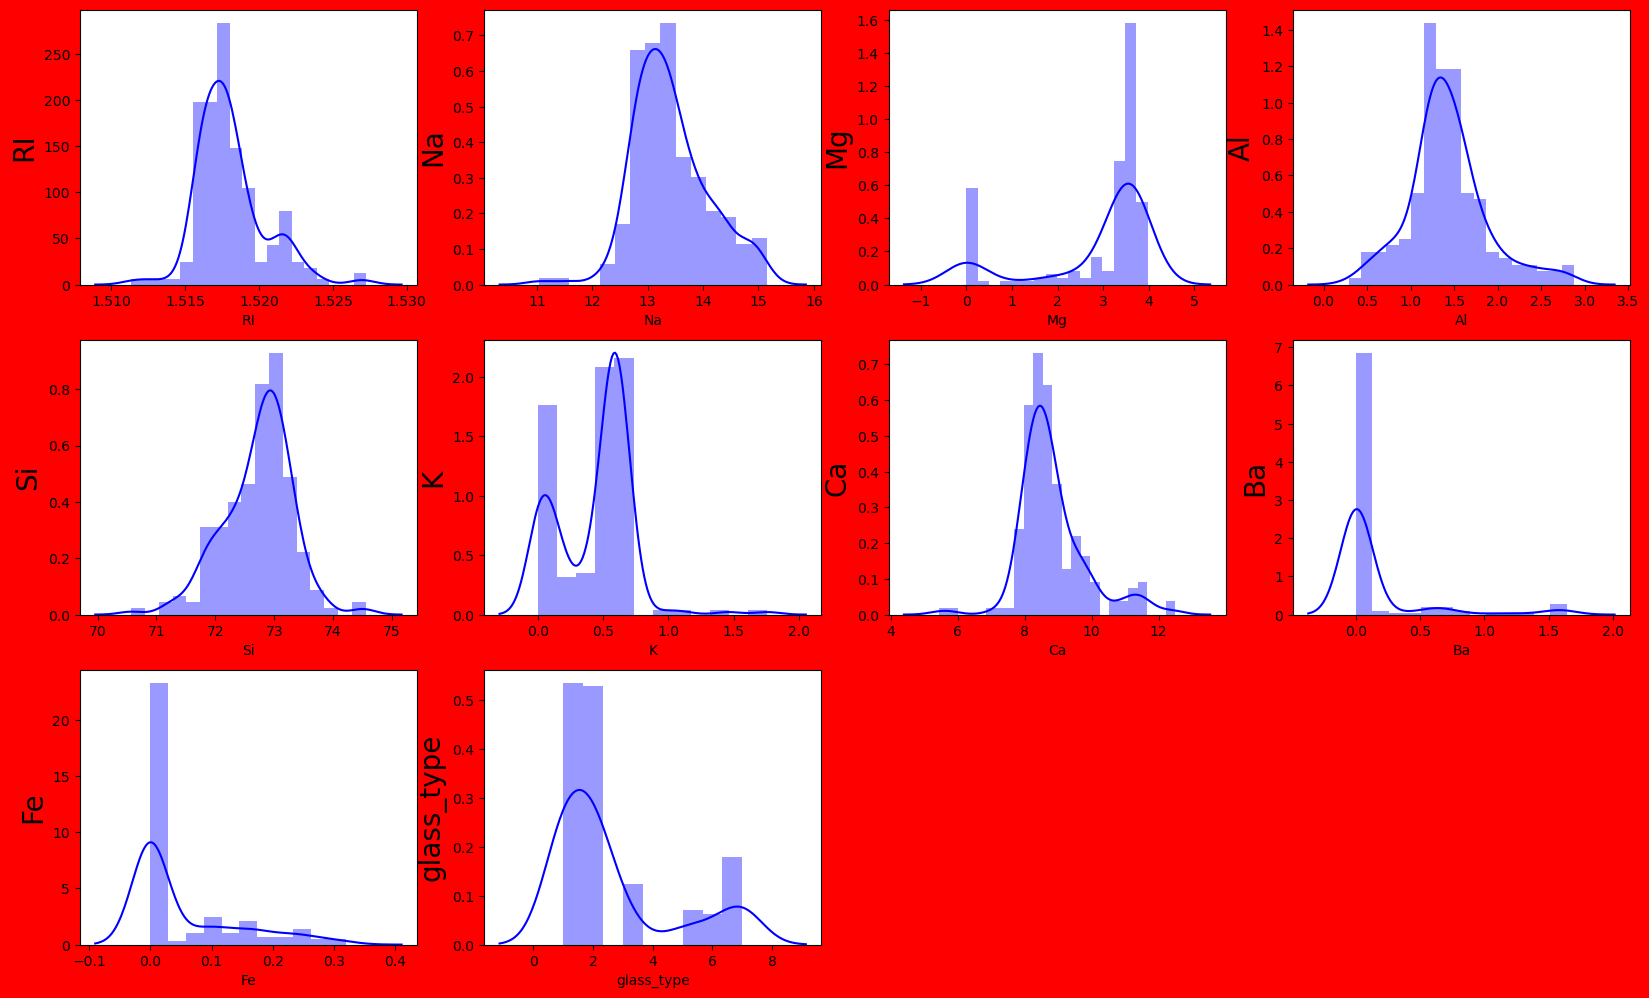

In [62]:
#checking distribution of data
plt.figure(figsize=(20,25), facecolor='red')
plotnumber = 1

for column in df:
    if plotnumber<=18:     
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color='b')
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.show() #From the distribution plots above we can see that the data almost looks normal but there is skeweness as explained while observing statistics.

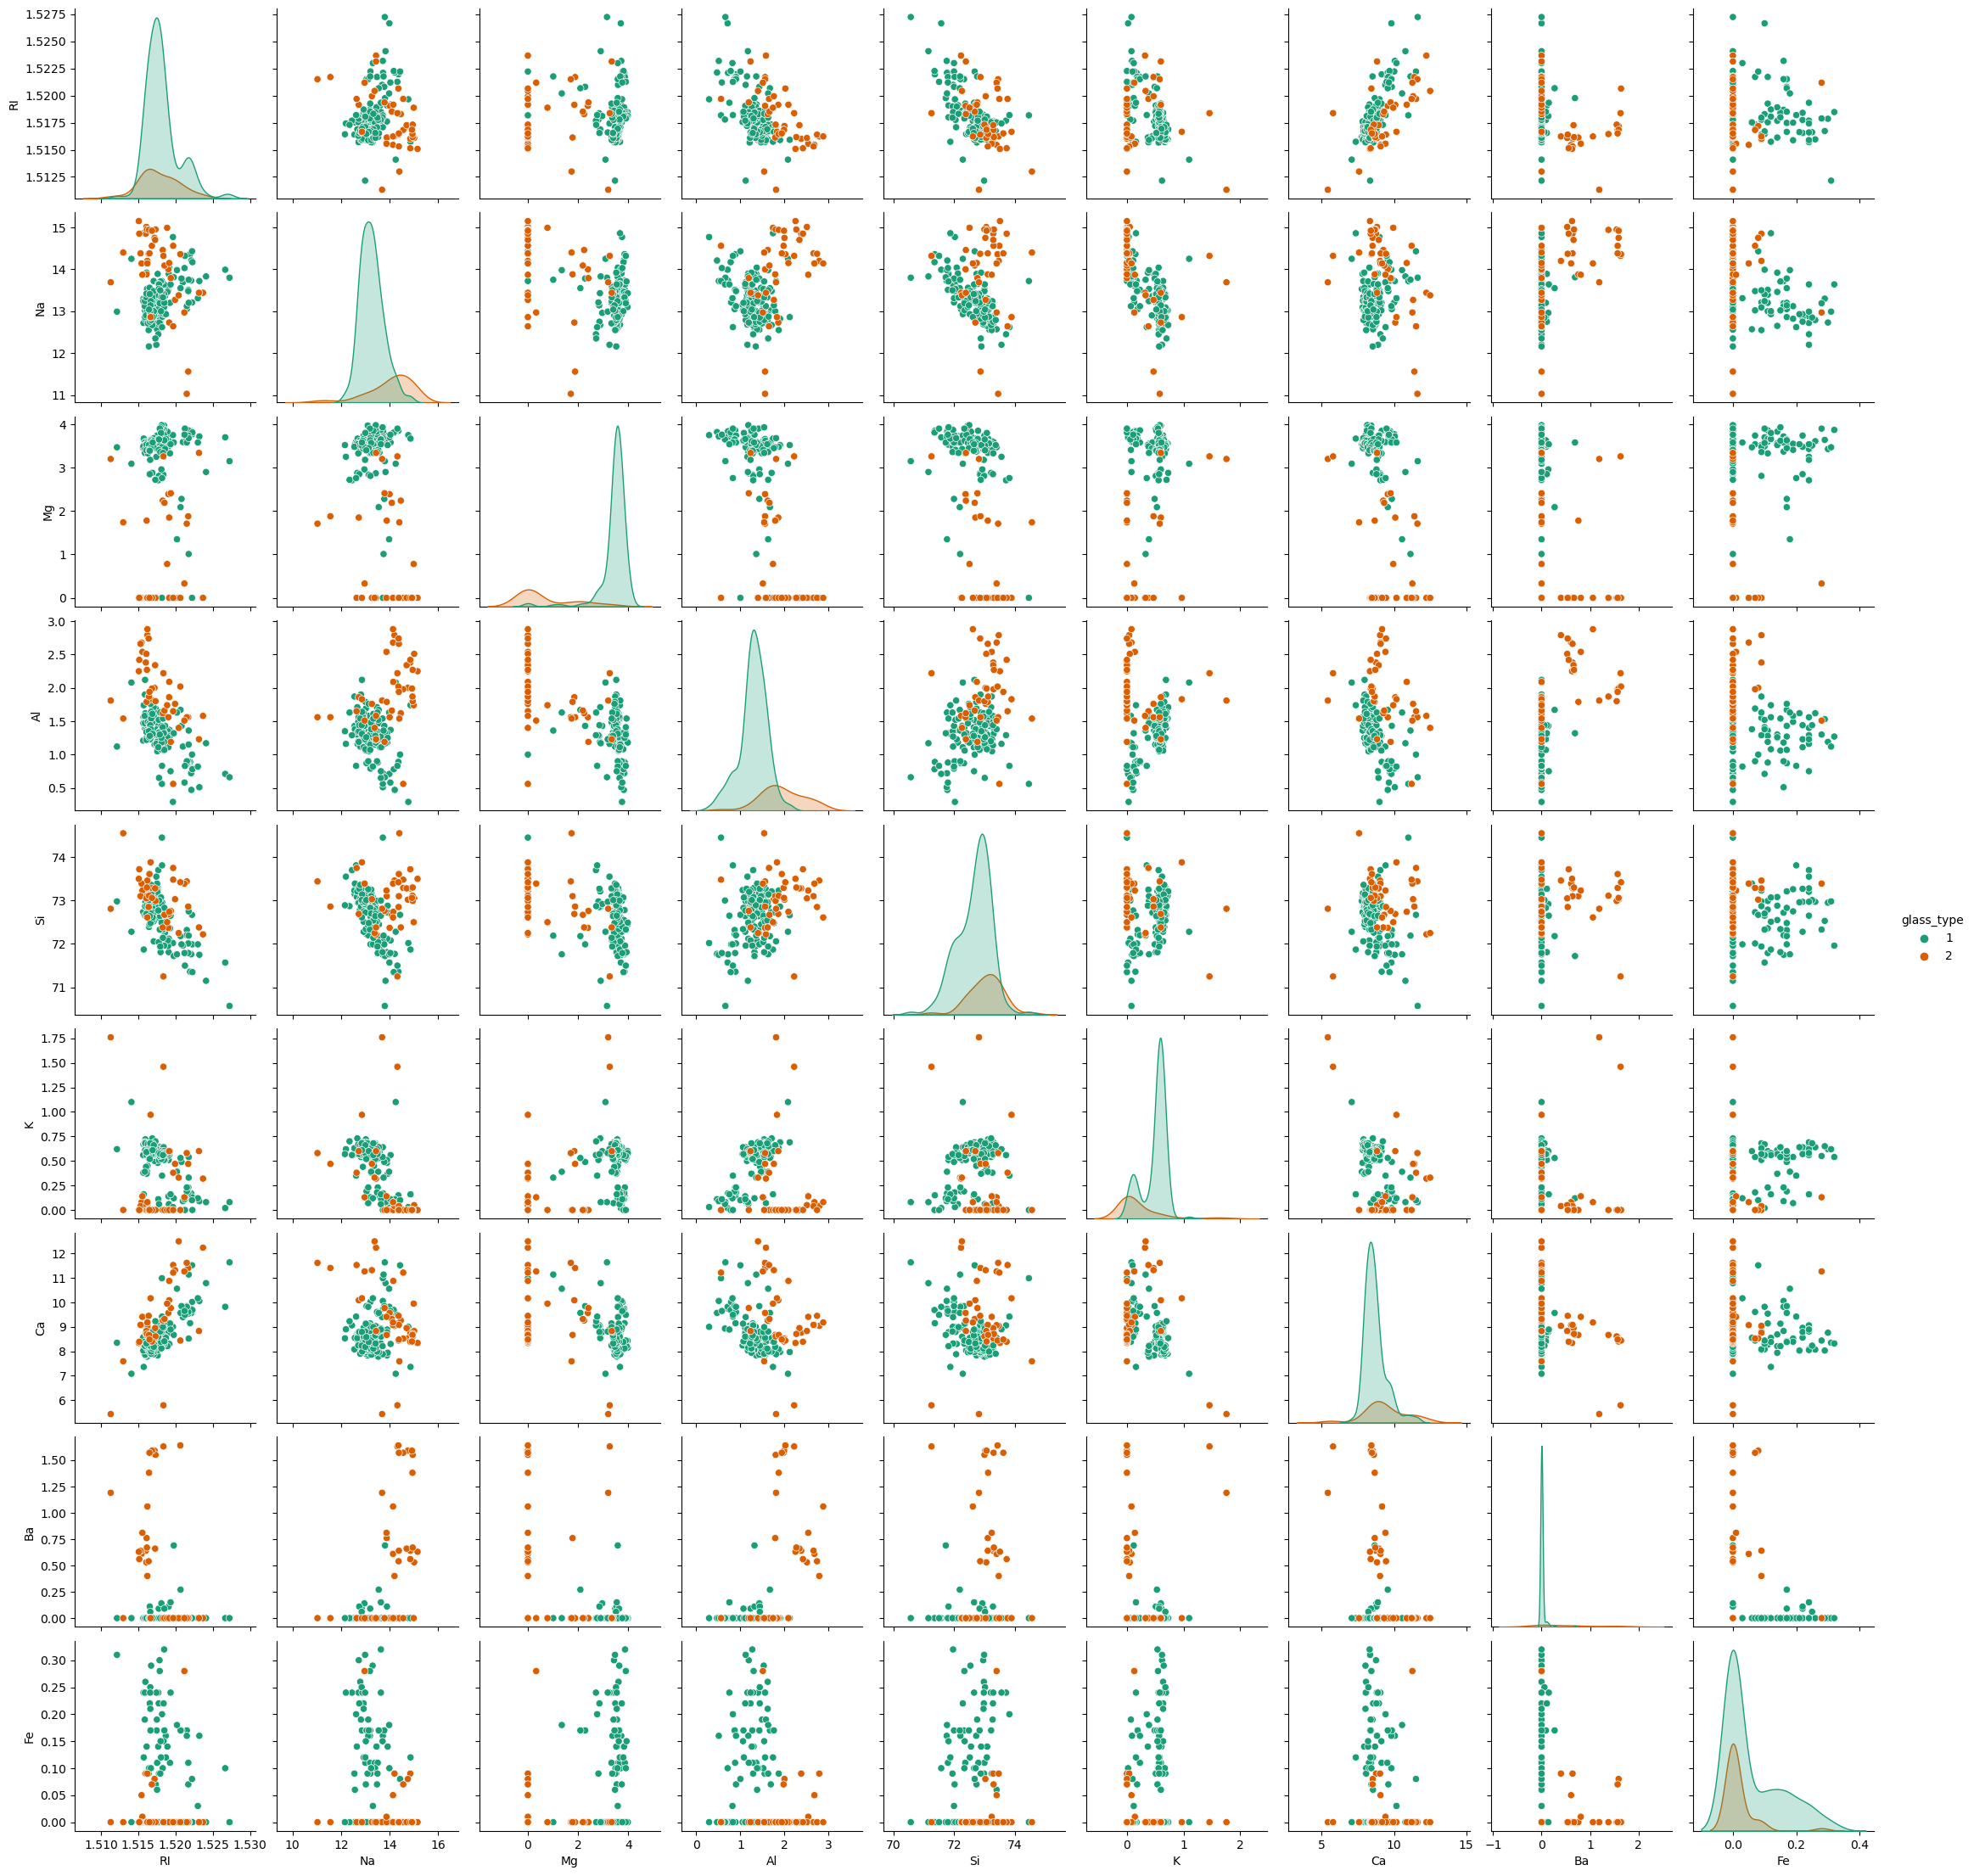

In [71]:
#Multivariate Analysis(the data shows some normal distribution when you check the diagonal plot)
sns.pairplot(df,hue="glass_type",palette="Dark2")
plt.show()

In [72]:
#Checking for Skewness
df.skew()

RI            0.971729
Na            0.375857
Mg           -1.533664
Al            0.649917
Si           -0.436288
K             0.297900
Ca            1.074092
Ba            3.178256
Fe            1.478611
glass_type    1.455790
dtype: float64

In [85]:
#Skeweness must be between -0.5 and 0.5,if not it must be removed
#Skeweness should not be removed from the target variable
#Remove skewness using cuberoot method
df['Ba']=np.cbrt(df['Ba'])

In [88]:
#Checking for Skewness again-the skeweness has been reduced in Ba column but this had no impact on the skeweness of the other columns 
df.skew()

RI            0.971729
Na            0.375857
Mg           -1.892297
Al            0.649917
Si           -0.436288
K             0.297900
Ca            1.074092
Ba            1.915227
Fe            1.478611
glass_type    1.455790
dtype: float64

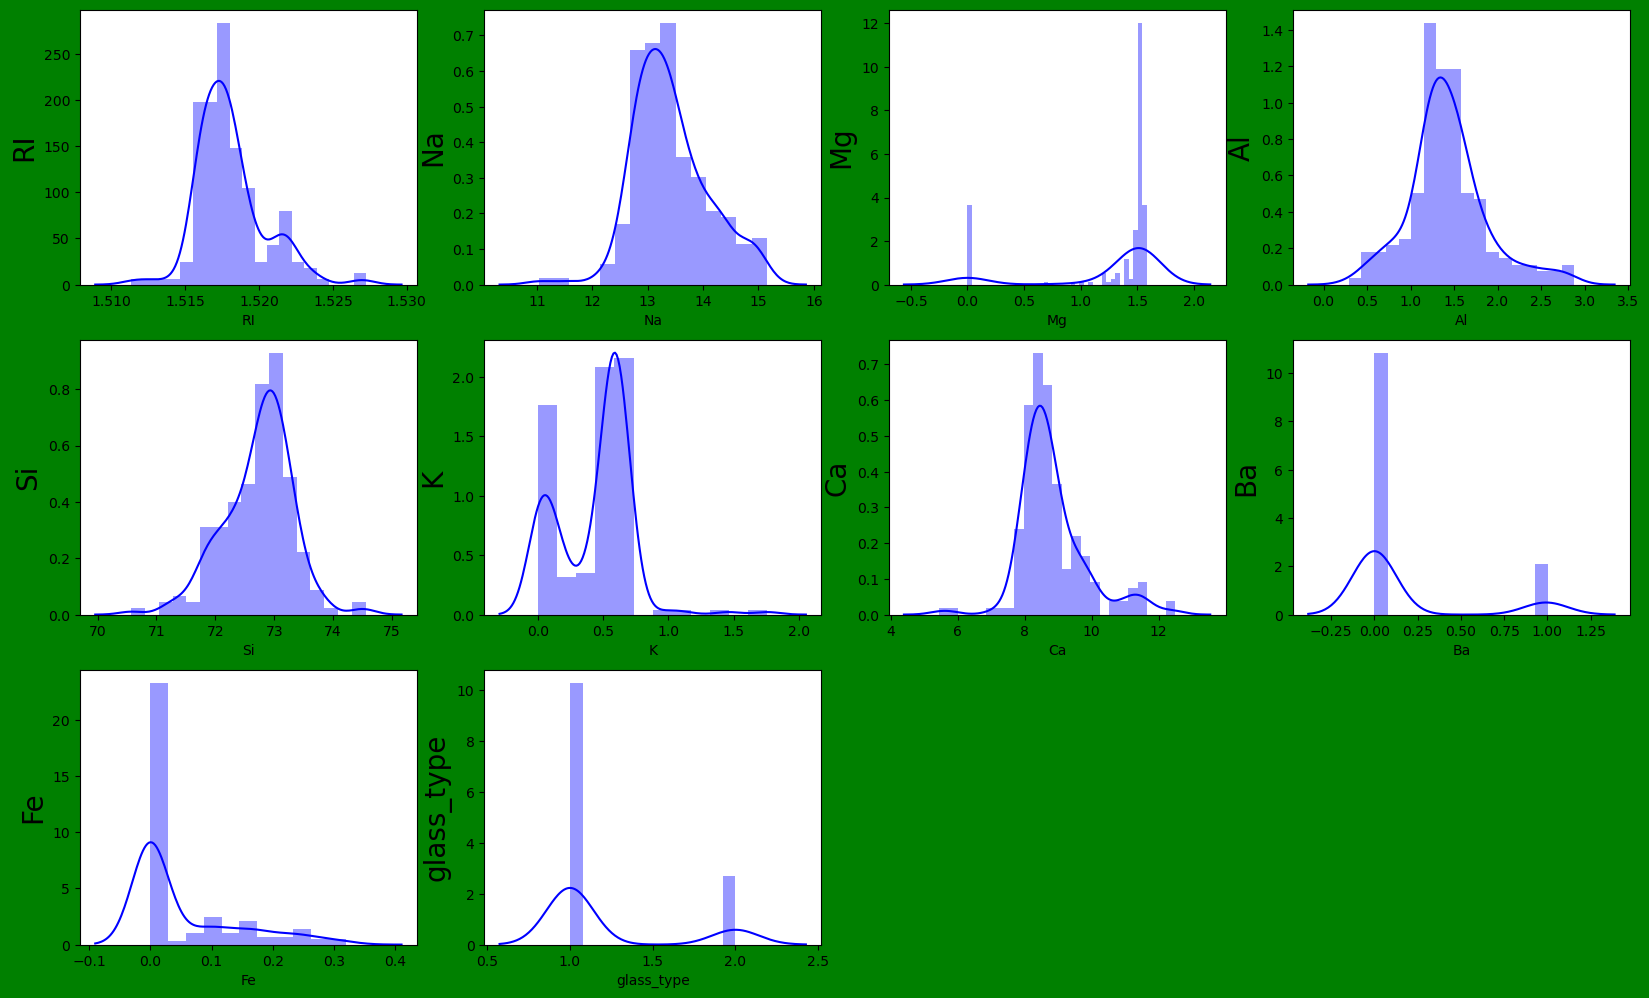

In [92]:
#checking distribution of data after removing skeweness
plt.figure(figsize=(20,25), facecolor='green')
plotnumber = 1

for column in df:
    if plotnumber<=18:     
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color='b')
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.show()

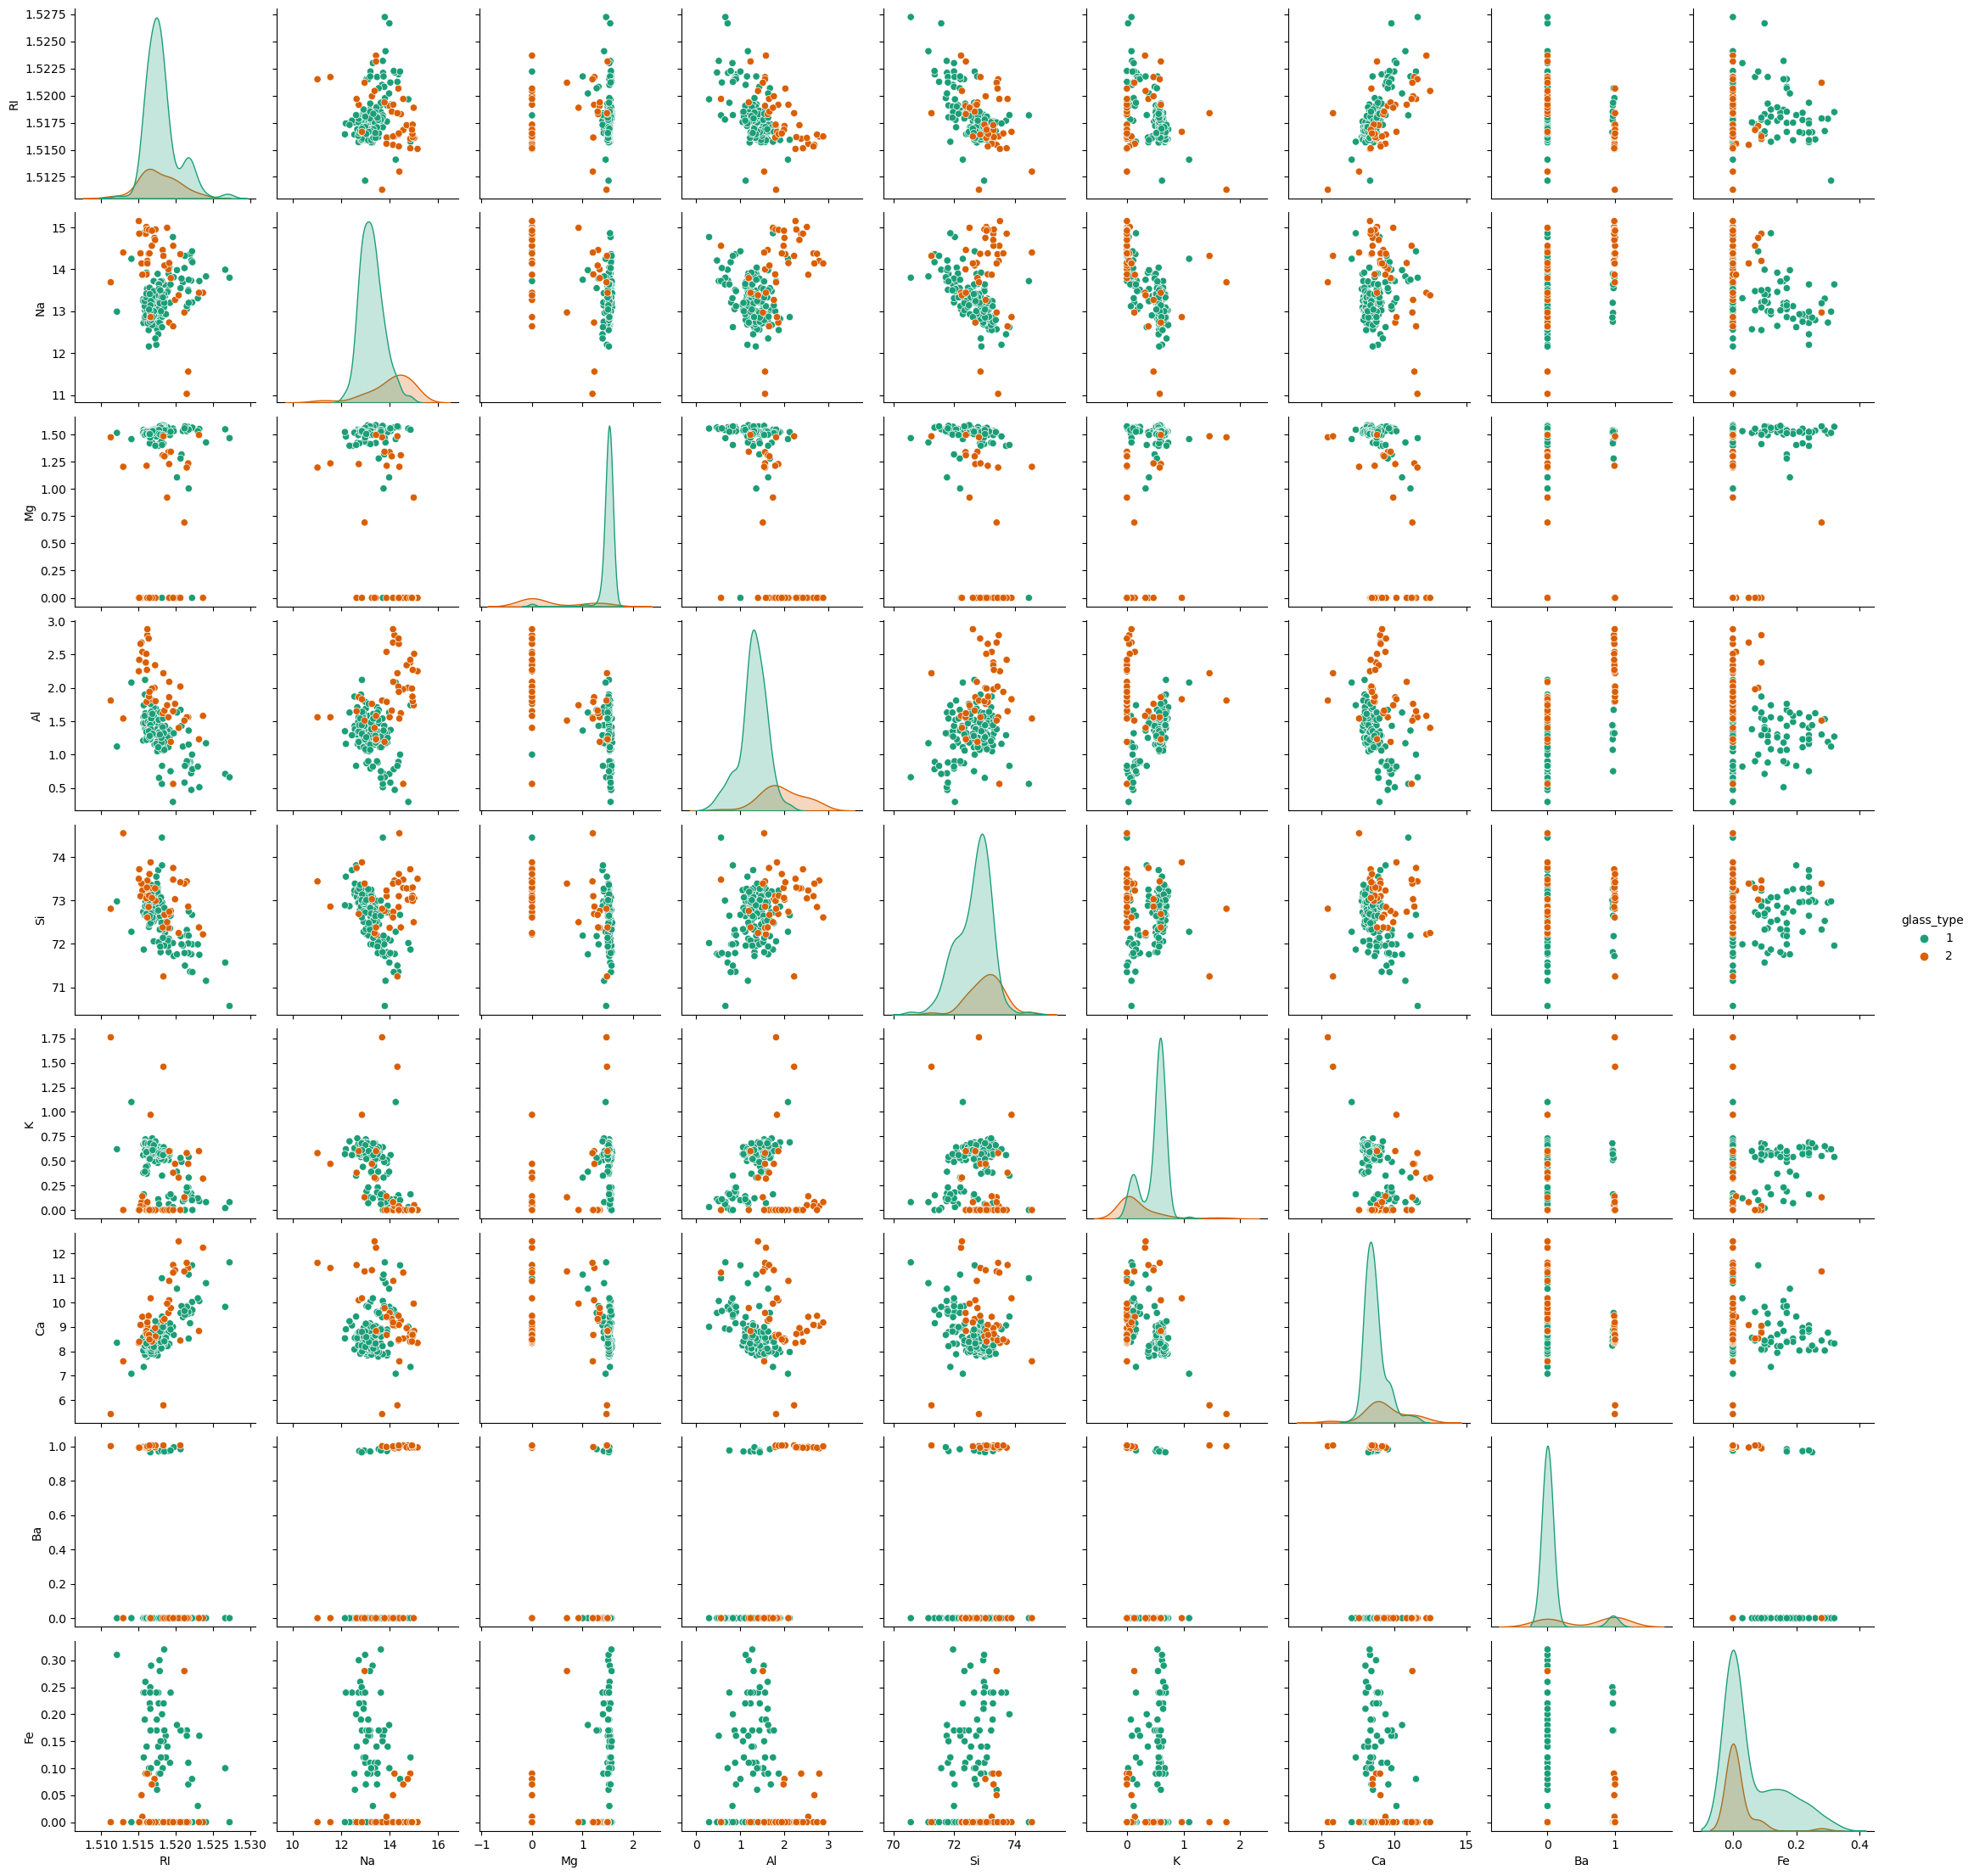

In [93]:
##Multivariate Analysis(the data shows some normal distribution when you check the diagonal plot) -After removing skeweness
sns.pairplot(df,hue="glass_type",palette="Dark2")
plt.show()

In [99]:
#checking correlation between  features and target
cor = df.corr()
cor

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
RI,1.000000,0.048762,0.059043,-0.520285,-0.604910,-0.362609,0.694174,-0.214385,-0.016095,-0.057285
Na,0.048762,1.000000,-0.528150,0.254805,-0.233588,-0.612858,0.020123,0.485705,-0.209057,0.465046
Mg,0.059043,-0.528150,1.000000,-0.579002,-0.359225,0.502401,-0.400280,-0.584860,0.153192,-0.799864
Al,-0.520285,0.254805,-0.579002,1.000000,0.331868,0.000847,-0.213887,0.557396,-0.120321,0.600057
Si,-0.604910,-0.233588,-0.359225,0.331868,1.000000,0.062254,-0.167478,0.177954,0.018382,0.280572
K,-0.362609,-0.612858,0.502401,0.000847,0.062254,1.000000,-0.503380,-0.275121,0.095794,-0.402067
Ca,0.694174,0.020123,-0.400280,-0.213887,-0.167478,-0.503380,1.000000,-0.117129,-0.011883,0.288043
Ba,-0.214385,0.485705,-0.584860,0.557396,0.177954,-0.275121,-0.117129,1.000000,0.004889,0.547244
Fe,-0.016095,-0.209057,0.153192,-0.120321,0.018382,0.095794,-0.011883,0.004889,1.000000,-0.209504
glass_type,-0.057285,0.465046,-0.799864,0.600057,0.280572,-0.402067,0.288043,0.547244,-0.209504,1.000000


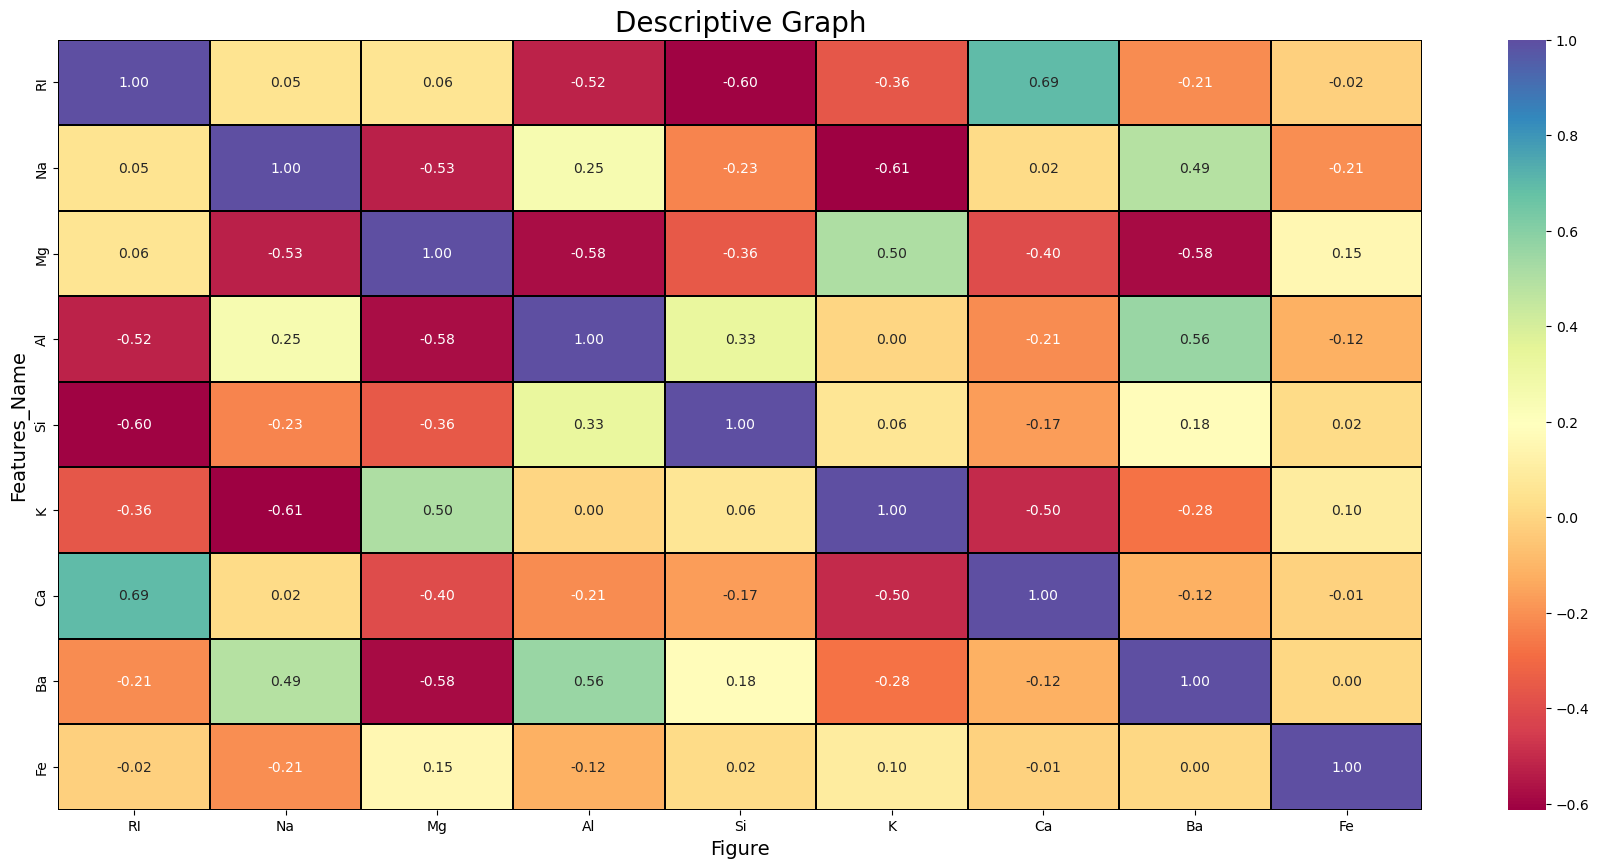

In [95]:
#Checking correlation using a graphic heatmap
plt.figure(figsize=(22,10))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Features_Name',fontsize=14)
plt.title('Descriptive Graph',fontsize=20)
plt.show()

<Axes: >

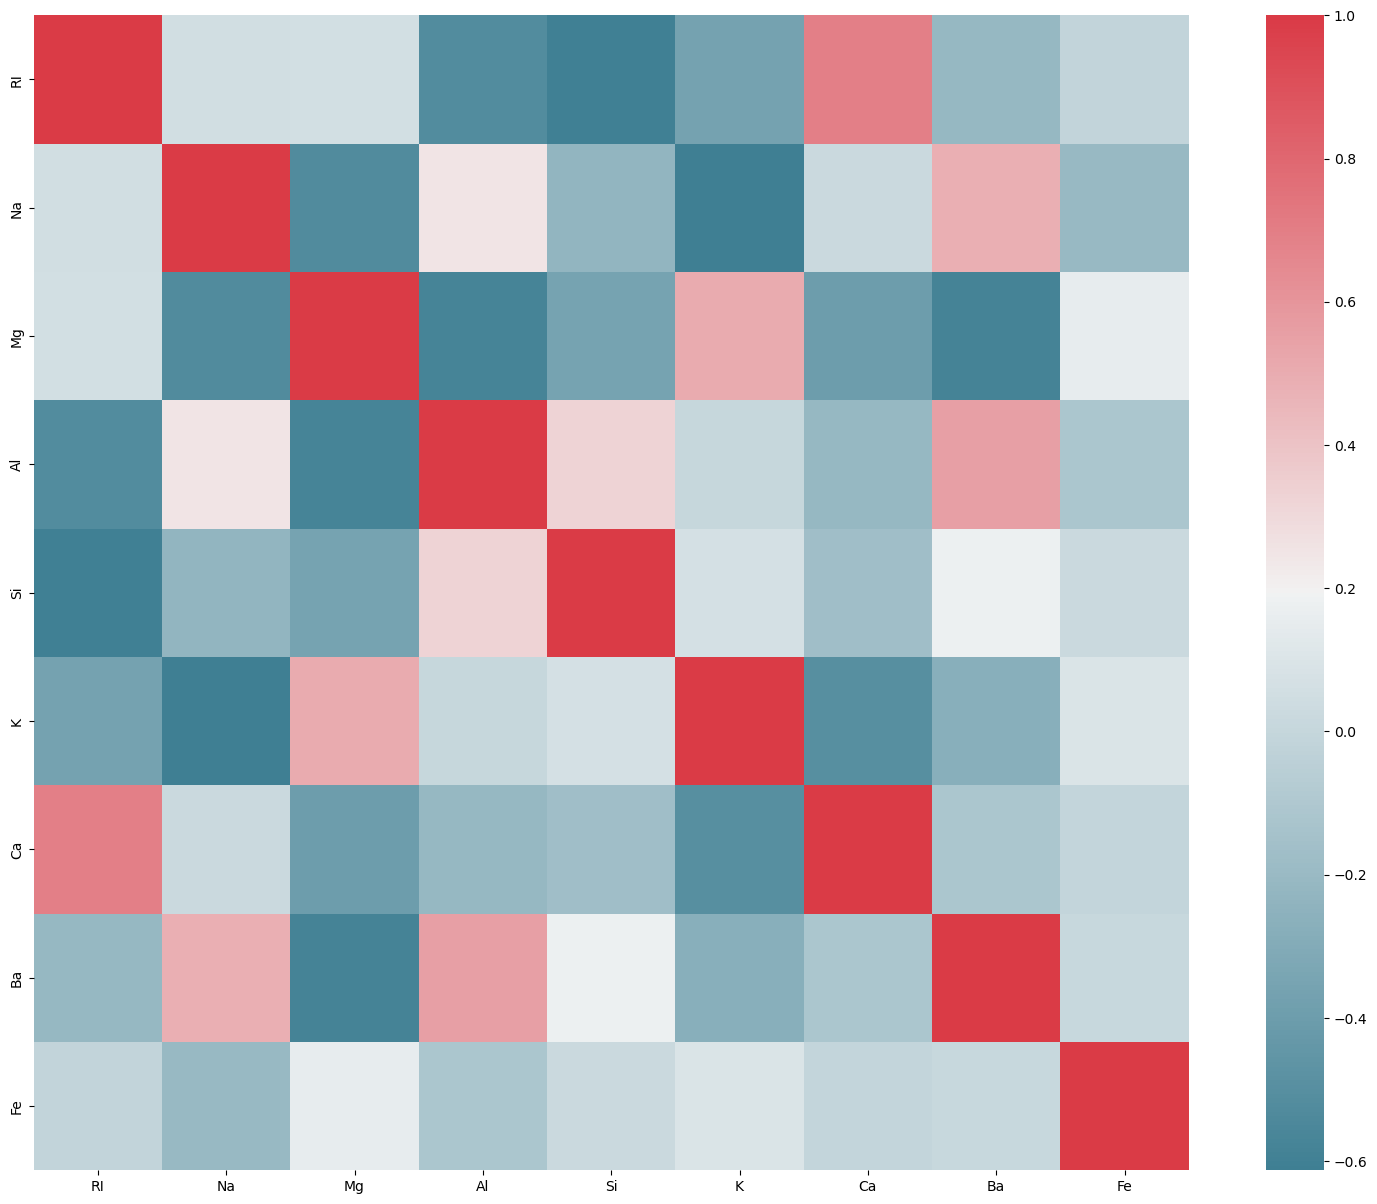

In [96]:
#Visualizing the correlation matrix byplotting heatmap.
f, ax = plt.subplots(figsize=(20, 15))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [ ]:
#features are both negatively and positively correlated as shown above which is a case of multicollinearity.Some a not correlated at all.
#the multicollinearuty must be removed but before that we need to seperate featurs and labels

In [100]:
#Seperate the target and independent variables into x and y
x=df.drop("glass_type",axis=1)
y=df["glass_type"]
print("Feature Dimension=",x.shape)
print("Label Dimension=",y.shape)

Feature Dimension= (193, 9)
Label Dimension= (193,)


In [101]:
#Feature scaling and using standard scalarization to remove biasness
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,-0.191475,0.704498,0.484188,-0.145324,0.007760,0.165576,-1.005952,-0.437406,-0.605187
1,-0.819092,0.169658,0.470877,0.260836,0.455342,-0.154697,-1.056501,-0.437406,-0.605187
2,-0.169531,-0.305754,0.507839,-0.303276,-0.198816,0.485849,-0.611669,-0.437406,-0.605187
3,-0.274865,-0.216615,0.489477,-0.416098,0.610275,0.414677,-0.763316,-0.437406,-0.605187
4,-0.915648,-0.929734,0.486835,0.441351,0.420913,0.734950,-0.763316,-0.437406,2.428607
...,...,...,...,...,...,...,...,...,...
188,-0.722535,1.417617,-2.377492,2.968571,0.214336,-1.542547,0.631836,2.286216,-0.605187
189,-0.797147,1.075914,-2.377492,3.284473,-0.198816,-1.257860,0.358872,2.308989,-0.605187
190,-0.525034,2.234732,-2.377492,1.276236,0.575845,-1.542547,-0.429693,2.322772,-0.605187
191,1.142758,1.402760,-2.377492,1.343930,1.195574,-1.542547,-0.389254,2.323827,-0.605187


In [102]:
#Checking Variance inflation factor in each scaled column that is x.shape[1](1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,5.090090,RI
1,7.211475,Na
2,12.362341,Mg
3,3.600047,Al
4,5.375456,Si
5,3.586313,K
6,7.979695,Ca
7,2.369542,Ba
8,1.112035,Fe


In [ ]:
#I will not drop the column with the highest VIF value so as not to loose too much data.The data will be dealt with by regularisation methods like Lasso and Ridge Regression

In [103]:
#Modelling

#Finding the best random state

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu,"at random_state",maxRS)

Best accuracy is  1.0 at random_state 5


In [104]:
#creating train test split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [121]:
#Import classification algorithms

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [106]:
#checking accuracy for Random Forest Classifier

RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9827586206896551
[[47  1]
 [ 0 10]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.91      1.00      0.95        10

    accuracy                           0.98        58
   macro avg       0.95      0.99      0.97        58
weighted avg       0.98      0.98      0.98        58



In [124]:
# checking testing accuracy:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
predKNN=KNN.predict(x_test)
print(accuracy_score(y_test,predKNN))
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

1.0
[[48  0]
 [ 0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        10

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



In [107]:
#checking accuracy of Logistic Regression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

1.0
[[48  0]
 [ 0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        10

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



In [108]:
#checking accuracy for Support Vector Machine Classifier
SVC=SVC()
SVC.fit(x_train,y_train)
predSVC=SVC.predict(x_test)
print(accuracy_score(y_test,predSVC))
print(confusion_matrix(y_test,predSVC))
print(classification_report(y_test,predSVC))

1.0
[[48  0]
 [ 0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        10

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



In [109]:
#checking accuracy for Gradient Boosting Classifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

1.0
[[48  0]
 [ 0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        10

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



In [110]:
#checking accuracy for AdaBoost Classifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.9827586206896551
[[48  0]
 [ 1  9]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.90      0.95        10

    accuracy                           0.98        58
   macro avg       0.99      0.95      0.97        58
weighted avg       0.98      0.98      0.98        58



In [111]:
#checking accuracy for Bagging Classifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.9827586206896551
[[48  0]
 [ 1  9]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.90      0.95        10

    accuracy                           0.98        58
   macro avg       0.99      0.95      0.97        58
weighted avg       0.98      0.98      0.98        58



In [112]:
#checking accuracy for ExtraTreesClassifier
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

1.0
[[48  0]
 [ 0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        10

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



In [113]:
#Cross validation Score
from sklearn.model_selection import cross_val_score

In [114]:
#Checking CV score for Random Forest Classifier
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predRFC)-score.mean())

[0.84615385 0.84615385 0.92307692 0.89473684 0.97368421]
0.896761133603239
Difference between Accuracy score and cross validation score is - 0.08599748708641619


In [125]:
#Checking CV score for Random Forest Classifier
score=cross_val_score(KNN,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predKNN)-score.mean())

[0.79487179 0.82051282 0.92307692 0.94736842 1.        ]
0.8971659919028341
Difference between Accuracy score and cross validation score is - 0.10283400809716592


In [115]:
#Checking CV score for Logistic Regression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predLR)-score.mean())

[0.82051282 0.82051282 0.8974359  0.89473684 0.97368421]
0.8813765182186234
Difference between Accuracy score and cross validation score is - 0.1186234817813766


In [116]:
#Checking CV score for Support Vector Machine Classifier
score=cross_val_score(SVC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predSVC)-score.mean())

[0.79487179 0.82051282 0.8974359  0.94736842 0.97368421]
0.8867746288798919
Difference between Accuracy score and cross validation score is - 0.11322537112010811


In [117]:
#Checking CV score for Gradient Boosting Classifier
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predGB)-score.mean())

[0.79487179 0.87179487 0.8974359  0.92105263 1.        ]
0.8970310391363021
Difference between Accuracy score and cross validation score is - 0.10296896086369789


In [118]:
#Checking CV score for AdaBoost Classifier
score=cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predABC)-score.mean())

[0.82051282 0.92307692 0.8974359  0.92105263 0.97368421]
0.9071524966261808
Difference between Accuracy score and cross validation score is - 0.07560612406347433


In [119]:
#Checking CV score for Bagging Classifier
score=cross_val_score(BC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predBC)-score.mean())

[0.79487179 0.8974359  0.8974359  0.92105263 0.97368421]
0.8968960863697706
Difference between Accuracy score and cross validation score is - 0.08586253431988455


In [120]:
#Checking CV score for ExtraTreesClassifier
score=cross_val_score(ET,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predET)-score.mean())

[0.84615385 0.82051282 0.8974359  0.94736842 1.        ]
0.9022941970310392
Difference between Accuracy score and cross validation score is - 0.09770580296896081


In [ ]:
#Model Selection
#AdaBoost Classifier is the best model with the least difference between accuracy and cross validation score

In [140]:
#Hyper parameter tuning

from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[1,2],'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0],'algorithm':['SAMME.R'],'random_state':[10,50,100]}

GVC=GridSearchCV(AdaBoostClassifier(),parameters,cv=5)
GVC.fit(x_train,y_train)

GVC.best_params_
{'n_estimators':1,'learning_rate':1.0,'algorithm':'SAMME.R','random_state':1000}

Final_model=AdaBoostClassifier(n_estimators=1,learning_rate=1.0,algorithm='SAMME.R',random_state=1000)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)





98.27586206896551
